In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns

# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [3]:
def population_risk(a, sigma_eps):
    return (a-1) ** 2 + sigma_eps ** 2

### b)

In [4]:
# sampling
n = 50
sigma_eps = 1
    
x = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma_eps, n)
y = x + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [5]:
def empirical_risk(a, x, y):
    return np.mean(np.square(a * x - y))

In [6]:
empirical_risk(1, x, y)

1.0651854107412528

### c)

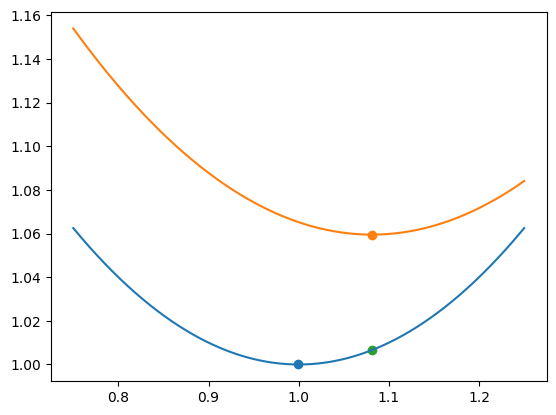

In [7]:
# code, plot
a = np.linspace(0.75, 1.25, num=1000)
pop_risk = population_risk(a, sigma_eps)
emp_risk = [empirical_risk(a_i, x, y) for a_i in a]
plt.scatter(a[np.argmin(pop_risk)], np.min(pop_risk))
plt.scatter(a[np.argmin(emp_risk)], np.min(emp_risk))
plt.scatter(a[np.argmin(emp_risk)], pop_risk[np.argmin(emp_risk)])
plt.plot(a, pop_risk)
plt.plot(a, emp_risk)

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [8]:
def excess_risk(a_hat, a_star, x, y, sigma_eps):
    def population_risk_sigma(a):
        return population_risk(a, sigma_eps)
    inf = optimize.minimize(population_risk_sigma, x0=0).x
    return (empirical_risk(a_hat, x, y) - inf)[0]

In [9]:
excess_risk(a[np.argmin(emp_risk)], 1, x, y, 1)

0.05951065642712994

In [10]:
# simulations with fixed sample size
L = 200
e_risks = []
for i in range(L):
    x = np.random.normal(0, 1, n)
    eps = np.random.normal(0, sigma_eps, n)
    y = x + eps
    emp_risk = [empirical_risk(a_i, x, y) for a_i in a]
    e_risks += [excess_risk(a[np.argmin(emp_risk)], 1, x, y, 1)]
np.mean(e_risks)

-0.020239225293493323

In [11]:
# simulations for various sample sizes

ns = [20, 50, 100, 250, 500]
results = []
L = 200
e_risks = []
for n in ns:
    e_risks = []
    for i in range(L):
        x = np.random.normal(0, 1, n)
        eps = np.random.normal(0, sigma_eps, n)
        y = x + eps
        emp_risk = [empirical_risk(a_i, x, y) for a_i in a]
        results += [{'n': n,
                    'excess_risk': excess_risk(a[np.argmin(emp_risk)], 1, x, y, 1)}]
results = pd.DataFrame(results)

In [12]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)

<Axes: xlabel='n', ylabel='excess_risk'>

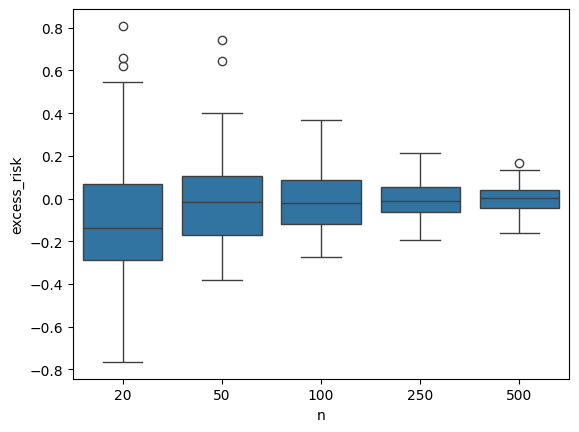

In [13]:
sns.boxplot(results, x='n', y='excess_risk')